## seaborn.barplotの引数一覧

```Python
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                estimator=<function mean>, ci=95, n_boot=1000, units=None,
                orient=None, color=None, palette=None, saturation=0.75,
                errcolor='.26', errwidth=None, capsize=None, ax=None, **kwargs)
```

| 引数       | 指定する値                                                                                                                                  | 
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------- | 
| x, y       | 集計対象の列名。x に指定した場合縦方向に、y に指定した場合横方向にグラフを描画する。                                                        | 
| hue        | 各軸をさらに分割して集計する場合に利用する列名を指定。                                                                                      | 
| data       | 集計対象のデータフレーム。                                                                                                                  | 
| order      | 出力する順番を文字列のリストで指定。                                                                                                        | 
| hue_order  | 上記 hue で指定した列を出力する順番を文字列のリストで指定。                                                                                 | 
| estimator  | (デフォルト値:&nbsp;)                                                                                                                       | 
| ci         | 信頼区間の幅。None&nbsp;を指定すると、ブートストラップを行わず、エラーバーも出力しない。 (デフォルト値: 95)                                 | 
| n_boot     | 信頼区間を求めるために行うブートストラップの繰り返し回数。 (デフォルト値: 1000)                                                             | 
| units      | マルチレベルでブートストラップを行う際にサンプリング単位。data&nbsp;で指定したデータフレームの列名または、配列で指定。 (デフォルト値: None) | 
| orient     | グラフの向きを指定。”v”(vertical, 垂直) または、”h” (horizontal, 水平) のいずれかを指定。                                               | 
| color      | 各列の色をリストまたはパレットで指定。                                                                                                      | 
| palette    | 上記 hue で指定した列の色リストまたはパレットで指定。 (デフォルト値: None)                                                                  | 
| saturation | 色の彩度。1 に近いほど原色に近く、0 に近いほど白・黒に近い色合いで出力。 (デフォルト値: 0.75)                                               | 
| errcolor   | 信頼区間を示すバーの色。/td>                                                                                                                | 
| errwidth   | 信頼区間を示すバーの幅                                                                                                                      | 
| capsize    | 信頼区間を示すバーの終端の線（キャップ）のサイズ                                                                                            | 
| ax         | 軸を重ねて出力する場合に指定。                                                                                                              | 

## seabornで棒グラフを作成する

`seaborn.barplot`は与えられたベクトル (数値で構成される配列) の平均値を高さとして、信頼区間をエラーバーとして出力します。

使用するデータは、seabornのライブラリの中から「tips（飲食店のチップの額）」を使用します。

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


それぞれのカラムは次の情報を表しています。

- total_bill : 総支払額(食事代、税込み)　(USドル)
- tip : チップ(USドル)
- sex : 性別
- smoker : 喫煙者か否か
- day : 曜日(木・金・土・日のいずれか)
- time : 食事の時間(昼食か夕食か)
- size : 人数

### X軸とY軸、集計対象のデータを指定して棒グラフを作成する | x, y, data

引数`x`に「day」, `y`に「total_bill」, `data`に「tips」を指定して棒グラフを作成します。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

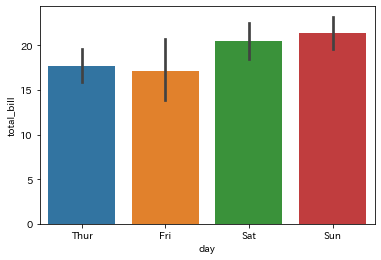

In [3]:
sns.barplot(x='day', y='total_bill', data=tips)

**ポイント**

作成された棒グラフの高さは、平均額を表しています。

### 曜日に対する支払総額を「男女別」に棒グラフに出力する | hue

引数`hue`に`sex`を指定して、棒グラフを作成します。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

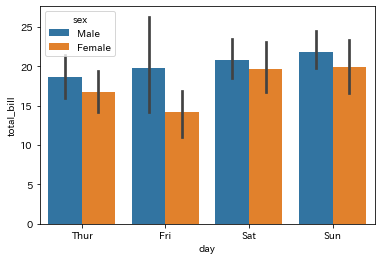

In [17]:
sns.barplot(x='day', y='total_bill', data=tips, hue='sex')

### 横方向の棒グラフを作成する

X軸に数値データの「total_bill」、Y軸に「day」を指定して横方向に棒グラフを作成します。

<AxesSubplot:xlabel='total_bill', ylabel='day'>

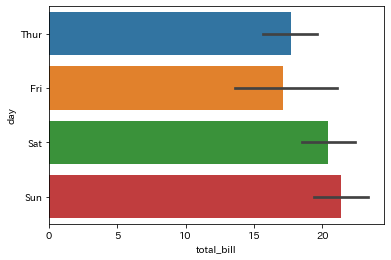

In [5]:
sns.barplot(x='total_bill', y='day', data=tips)

**ポイント**

X軸に数値データ、Y軸に離散変数を指定することで横方向の棒グラフを作成することが出来ます。

### グラフに出力するX軸の順番を指定する | order

引数`x`に「time」、`y`に「tip」を指定して、昼食と夕食ごとのチップ額の平均をグラフにしてみます。

<AxesSubplot:xlabel='time', ylabel='tip'>

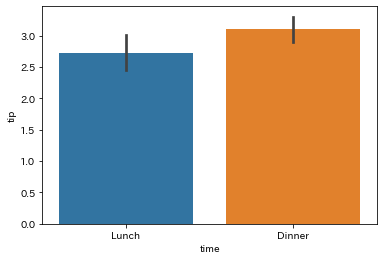

In [7]:
# 引数orderを指定しない場合
sns.barplot(x="time", y="tip", data=tips)

引数`order`にグラフに出力する順番をリストで指定して、棒グラフを作成してみます。

<AxesSubplot:xlabel='time', ylabel='tip'>

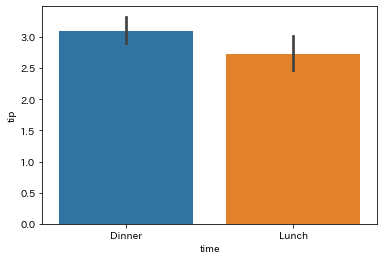

In [18]:
# 引数orderを指定する場合
sns.barplot(x="time", y="tip", data=tips, order=['Dinner', 'Lunch'])

### 信頼区間を指定して、棒グラフを作成する | ci

引数`ci`に信頼区間の数値を％で指定して、棒グラフを作成します。

信頼区間はデフォルトでは95%です。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

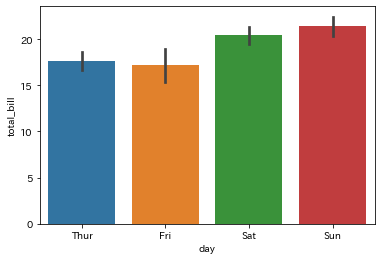

In [19]:
sns.barplot(x='day', y='total_bill', data=tips, ci=68)

**ポイント**

信頼区間とは、「母集団から標本を取ってきて、その平均からx%信頼区間を求める、という作業を100回やったときに、x回はその区間の中に母平均が含まれる」という「頻度」もしくは「割合」を意味します。

### 信頼区間を示すバーの終端の線（キャップ）のサイズを指定する | capsize

<AxesSubplot:xlabel='day', ylabel='total_bill'>

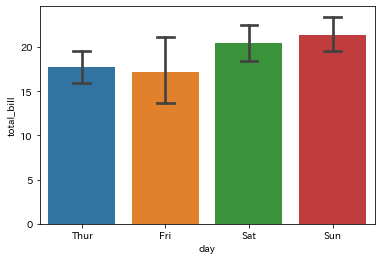

In [16]:
sns.barplot(x="day", y="total_bill", data=tips, capsize=0.2)

### バーの色を指定する | color

引数`color`に色を指定すると、バーの色を統一することが出来ます。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

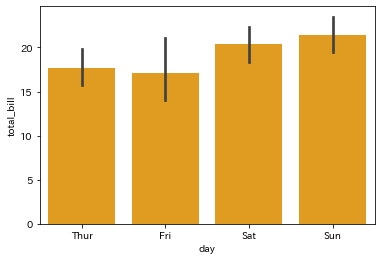

In [21]:
sns.barplot(x="day", y="total_bill", data=tips, color='orange')

### カラーパレットを使用して棒グラフを作成する | palette

引数`palette`にカラーパレットを指定することで、バーの色にグラデーションをつけます。

http://seaborn.pydata.org/generated/seaborn.dark_palette.html#seaborn.dark_palette
http://seaborn.pydata.org/generated/seaborn.light_palette.html#seaborn.light_palette
http://seaborn.pydata.org/generated/seaborn.diverging_palette.html#seaborn.diverging_palette

<AxesSubplot:xlabel='day', ylabel='total_bill'>

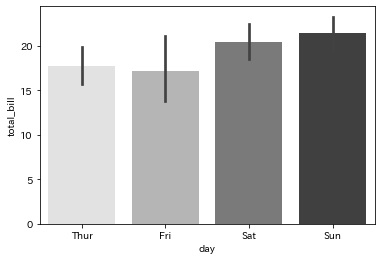

In [23]:
sns.barplot(x="day", y="total_bill", data=tips, palette="Greys")

### 線の太さ、線の色、エラーバーの色を指定する | linewidth, edgecolor, errcolor

<AxesSubplot:xlabel='day', ylabel='total_bill'>

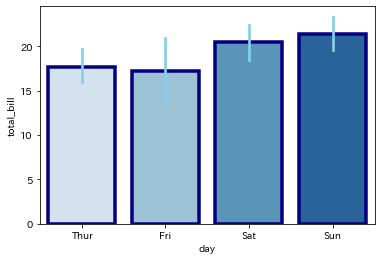

In [24]:
sns.barplot(x="day", y="total_bill", data=tips, palette="Blues", linewidth=3.5, edgecolor="navy", errcolor="skyblue")

## 複数の棒グラフを出力する

figureオブジェクトとaxesオブジェクトを作成することで、グラフを描画するスペースの大きさ（幅、高さ）とその中にいくつのグラフを作成するかを指定することが出来ます。

### 複数の棒グラフを出力する | ax

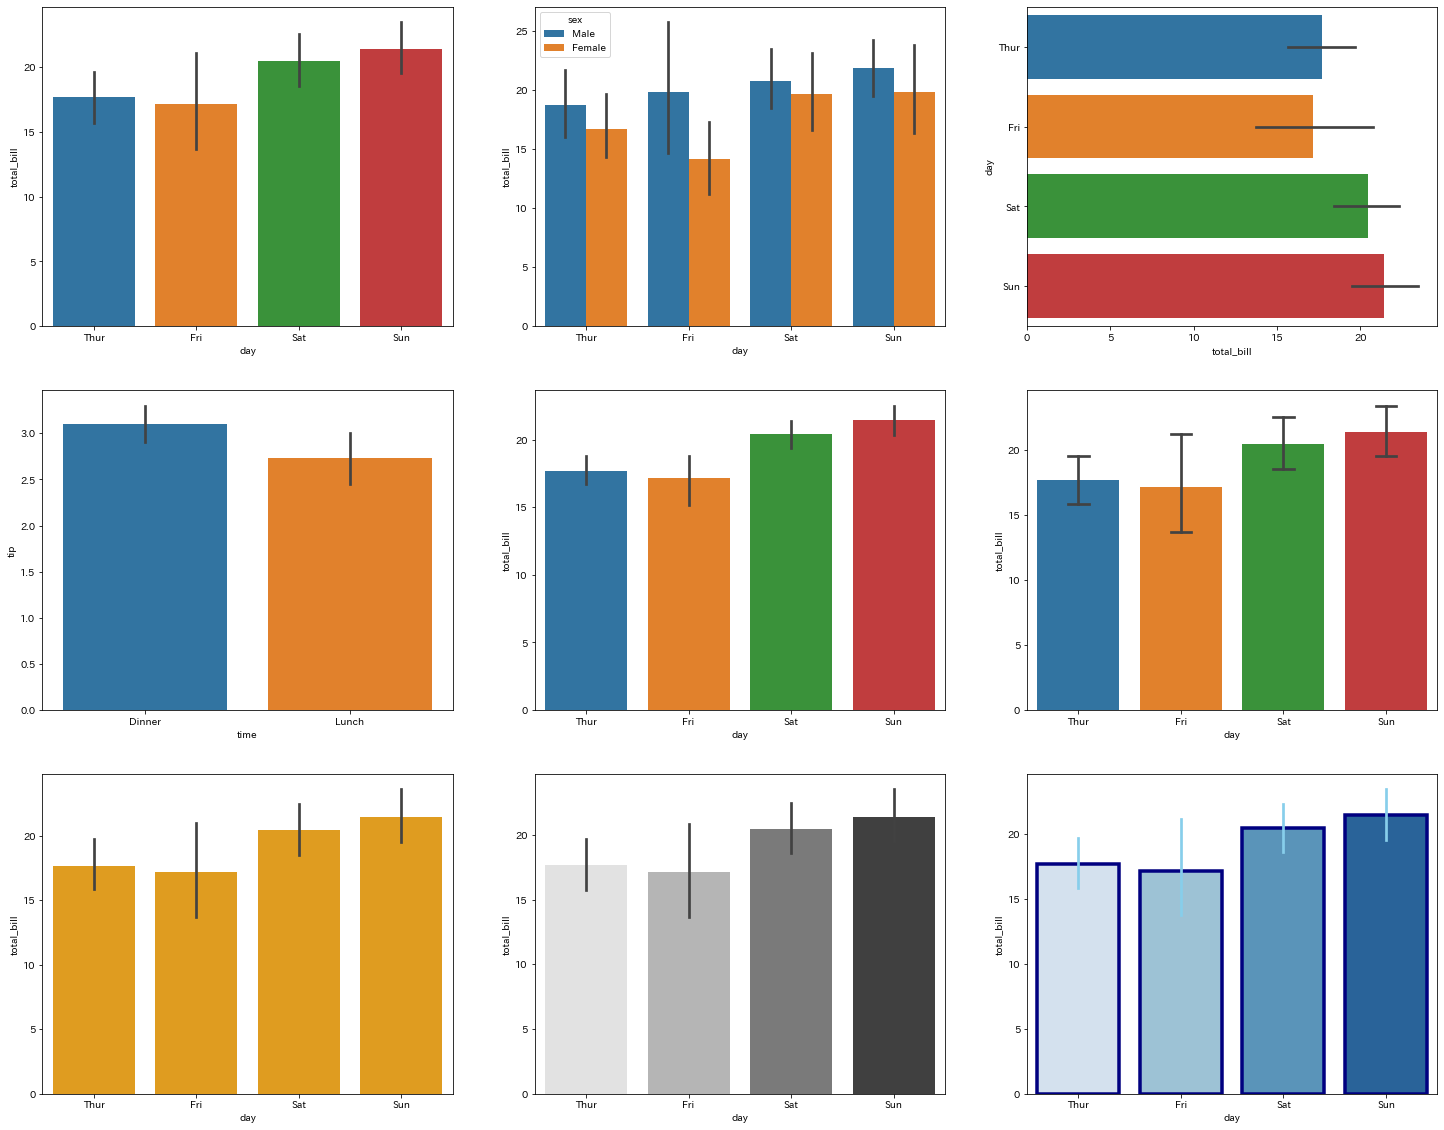

In [34]:
# figureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(3, 3, figsize=(25,20))

sns.barplot(x='day', y='total_bill', data=tips, ax=ax[0,0])
sns.barplot(x='day', y='total_bill', data=tips, hue='sex', ax=ax[0,1])
sns.barplot(x='total_bill', y='day', data=tips, ax=ax[0,2])
sns.barplot(x="time", y="tip", data=tips, order=['Dinner', 'Lunch'], ax=ax[1,0])
sns.barplot(x='day', y='total_bill', data=tips, ci=68, ax=ax[1,1])
sns.barplot(x="day", y="total_bill", data=tips, capsize=0.2, ax=ax[1,2])
sns.barplot(x="day", y="total_bill", data=tips, color='orange', ax=ax[2,0])
sns.barplot(x="day", y="total_bill", data=tips, palette="Greys", ax=ax[2,1])
sns.barplot(x="day", y="total_bill", data=tips, palette="Blues", linewidth=3.5, edgecolor="navy", errcolor="skyblue", ax=ax[2,2])

plt.savefig('barplots.png')